# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Natalia\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable

load_dotenv()
api_key = os.getenv("NEWSAPI_KEY")


In [3]:
# Create a newsapi client

from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles

btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles


eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame

sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,Compound,Negative,Neutral,Positive,text
0,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec..."
1,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi..."
2,-0.0516,0.071,0.864,0.065,"The question still remained, though, whether a..."
3,0.5106,0.000,0.878,0.122,A ransomware variant called NetWalker is doing...
4,0.2732,0.000,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...


In [7]:
# Create the ethereum sentiment scores DataFrame

sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,Compound,Negative,Neutral,Positive,text
0,0.7506,0.000,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...
2,0.7579,0.000,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
3,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...
4,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...


In [8]:
# Describe the Bitcoin Sentiment

btc.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.411560,0.005850,0.90770,0.086450
std,0.225249,0.018457,0.03952,0.042427
min,-0.128000,0.000000,0.80200,0.000000
25%,0.365900,0.000000,0.91000,0.072000
50%,0.507000,0.000000,0.91000,0.090000
75%,0.507000,0.000000,0.91425,0.090000
max,0.750600,0.071000,1.00000,0.198000


In [9]:
# Describe the Ethereum Sentiment

eth.describe()

,Compound,Negative,Neutral,Positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.129412,0.026706,0.910471,0.062824
std,0.367736,0.056512,0.091491,0.067970
min,-0.599400,0.000000,0.732000,0.000000
25%,0.000000,0.000000,0.877000,0.000000
50%,0.000000,0.000000,0.928000,0.057000
75%,0.401900,0.000000,1.000000,0.110000
max,0.757900,0.189000,1.000000,0.209000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score of 0.86

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score of 20.000 

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score of 0.209

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary

wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop.append("'ve'")
stop = set(stop)

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [17]:
# Create a new tokens column for bitcoin

btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec...","[Casa, Colorado-based, provider, bitcoin, secu..."
1,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi...","[April, Secret, Service, seized, 100, Bitcoins..."
2,-0.0516,0.071,0.864,0.065,"The question still remained, though, whether a...","[question, still, remained, though, whether, G..."
3,0.5106,0.000,0.878,0.122,A ransomware variant called NetWalker is doing...,"[ransomware, variant, called, NetWalker, surpr..."
4,0.2732,0.000,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...,"[“, COVID-19, pandemic, resulted, mass, shift,..."


In [18]:
# Create a new tokens column for ethereum

eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.7506,0.000,0.791,0.209,If you've interacted with cryptocurrencies in ...,"['ve, interacted, cryptocurrencies, past, coup..."
1,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,"[TL, DR, Mega, Blockchain, Mastery, Bundle, sa..."
2,0.7579,0.000,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[LONDON, Reuters, sound, like, surefire, bet, ..."
3,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[NEW, YORK, Reuters, Brooklyn-based, technolog..."
4,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,"[outspoken, Bitcoin, whale, rarely, show, affe..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2

N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)


[(('Satoshi', 'Nakaboto'), 22),
 (('char', 'robot'), 11),
 (('robot', 'colleague'), 11),
 (('colleague', 'Satoshi'), 11),
 (('Nakaboto', 'writes'), 11),
 (('writes', 'Bitcoin'), 11),
 (('every', 'fucking'), 11),
 (('fucking', 'day'), 11),
 (('day', 'Welcome'), 11),
 (('Welcome', 'another'), 11),
 (('another', 'edition'), 11),
 (('edition', 'Bitcoin'), 11),
 (('Bitcoin', 'Today'), 11),
 (('Today', 'Satoshi'), 11),
 (('Nakaboto', 'tell'), 11),
 (('tell', 'whats'), 11),
 (('whats', 'going'), 11),
 (('going', 'Bitcoin'), 11),
 (('Bitcoin', 'BTC'), 9),
 (('BTC', 'every'), 9)]

In [21]:
# Generate the Ethereum N-grams where N=2

N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('ul', 'li'), 3),
 (('char', 'Ethereum'), 3),
 (('Images/LightRocket', 'via'), 2),
 (('via', 'Getty'), 2),
 (('Getty', 'Images'), 2),
 (('price', 'Bitcoin'), 2),
 (('Creator', 'Coin'), 2),
 (("'ve", 'interacted'), 1),
 (('interacted', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'past'), 1),
 (('past', 'couple'), 1),
 (('couple', 'year'), 1),
 (('year', 'good'), 1),
 (('good', 'chance'), 1),
 (('chance', "'ve"), 1),
 (("'ve", 'used'), 1),
 (('used', 'MetaMask'), 1),
 (('MetaMask', 'cryptocurrency'), 1),
 (('cryptocurrency', 'wallet'), 1),
 (('wallet', 'form'), 1)]

In [22]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Get the top 10 words for Bitcoin

all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('Bitcoin', 35),
 ('Satoshi', 22),
 ('Nakaboto', 22),
 ('char', 20),
 ('robot', 11),
 ('colleague', 11),
 ('writes', 11),
 ('every', 11),
 ('fucking', 11),
 ('day', 11)]

In [24]:
# Get the top 10 words for Ethereum

all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 17),
 ('Ethereum', 8),
 ('price', 6),
 ('Bitcoin', 6),
 ('cryptocurrency', 5),
 ('’', 4),
 ('li', 4),
 ("'ve", 3),
 ('could', 3),
 ('ul', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

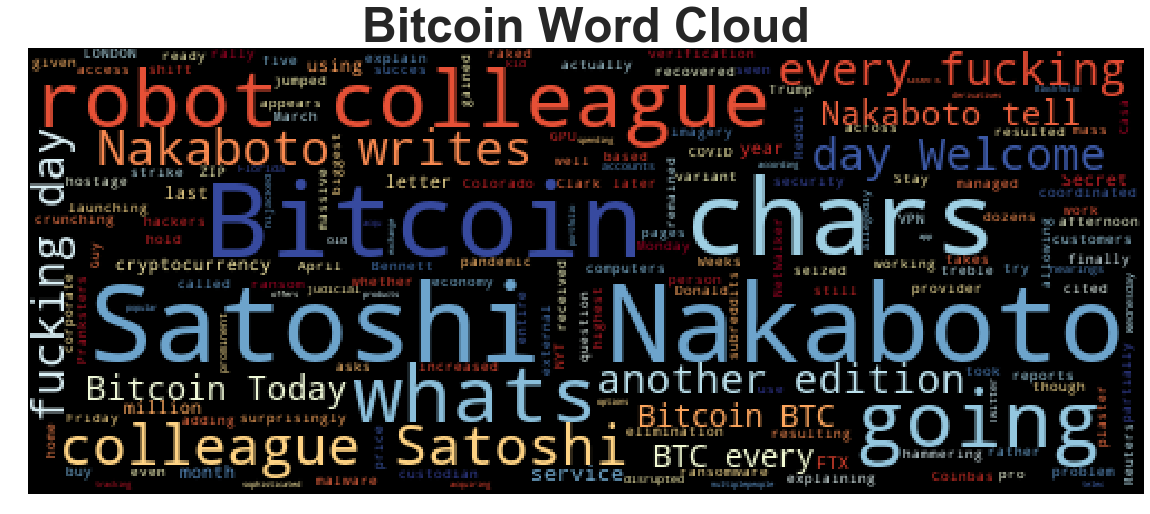

In [26]:
# Generate the Bitcoin word cloud


    
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

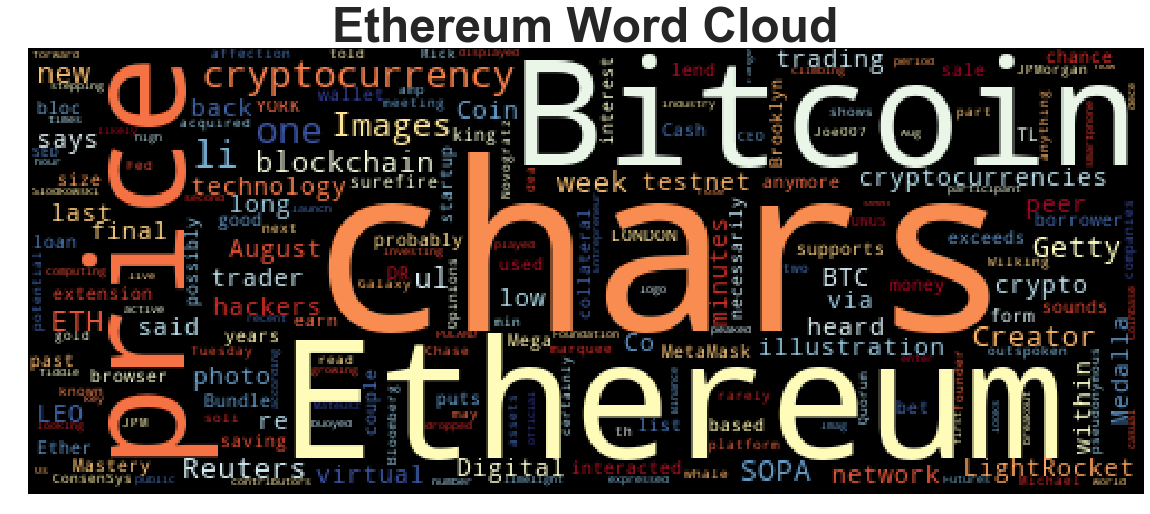

In [27]:
# Generate the Ethereum word cloud

wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [31]:
# Concatenate all of the bitcoin text together

all_btc_text = btc.text.str.cat()
all_btc_text

"Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars]In April, the Secret Service seized 100 Bitcoins from Clark, NYT reports. Weeks later, Bennett received a letter explaining that the Secret Service had recovered 100 of his Bitcoins. The letter cited… [+884 chars]The question still remained, though, whether all that GPU-crunching would actually work. After months of hammering on the problem, Stay was finally ready to try. The Guy hadn't given the entire ZIP f… [+2880 chars]A ransomware variant called NetWalker is doing surprisingly well, even in this economy. The malware, which takes computers hostage and asks for a Bitcoin ransom, raked in $25 million in the last five… [+1606 chars]“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-pers

In [32]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [33]:
# Render the visualization


displacy.render(doc, style='ent', jupyter=True)

In [34]:
# List all Entities

for ent in doc.ents:
    print(ent.text, ent.label_)

Casa ORG
Colorado GPE
Coinbas ORG
April DATE
the Secret Service ORG
100 CARDINAL
Bitcoins ORG
Clark GPE
Weeks later DATE
Bennett PERSON
the Secret Service ORG
100 CARDINAL
months DATE
Guy PERSON
NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
VPN PRODUCT
Reddit ORG
over dozens CARDINAL
Friday DATE
afternoon TIME
pro-Donald Trump PERSON
Reuters ORG
Bitcoin GPE
over a year DATE
Monday DATE
2020 DATE
March DATE
4.4% PERCENT
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Wednesday DATE
17-year-old DATE
Florida GPE
Twitter ORG
last month DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin

---

## Ethereum NER

In [35]:
# Concatenate all of the bitcoin text together

all_eth_text = eth.text.str.cat()
all_eth_text

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]TL;DR: The Mega Blockchain Mastery Bundle is on sale for £29.81 as of August 17, saving you 97% on list price.\r\nCash isn't necessarily king anymore. You've probably heard that cryptocurrency and bloc… [+1286 chars]LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars]NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain platform Quorum, the companies said on Tuesday. \r\nAs part of the dea… [+1915 chars]An outspoken Bitcoin whale who rarely shows affection for anything other than BTC says two crypto assets have potential.\r\nThe pseudonymou

In [36]:
# Run the NER processor on all of the text

eth_doc = nlp(all_eth_text)

# Add a title to the document

eth_doc.user_data["title"] = "Ethereum NER"

In [37]:
# Render the visualization

displacy.render(eth_doc, style='ent', jupyter=True)

In [38]:
# List all Entities

for ent in eth_doc.ents:
    print(ent.text, ent.label_)

the past couple of years DATE
29.81 MONEY
August 17 DATE
97% PERCENT
Reuters ORG
about 20% PERCENT
YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Rick Wilking PERSON
ul><li PERSON
Michael Novogratz PERSON
Bloomberg PERSON
up to $3,000 MONEY
The Galaxy Digital ORG
Fed ORG
4 CARDINAL
2020 DATE
5 CARDINAL
one CARDINAL
first ORDINAL
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
Ethereum ORG
Mateusz Slodkowski/ PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
Medalla PERSON
the Ethereum Foundation ORG
ul><li PERSON
Medalla GPE
Aug. 2 DATE
418 MONEY
5 minutes TIME
25% PERCENT
Binance Futures ORG
ETH ORG
as low as $302 MONEY
385 MONEY
10 minutes TIME
chars]usa PRODUCT
one hundred dollar MONEY
Fintech ORG
YouTube PRODUCT
Bitcoin GPE
one-week DATE
ul><li PERSON
Bitcoin GPE
BTC ORG
around $11,595 MONEY
20:0 CARDINAL
Creator Coin P